# Top 50 Matplotlib plots useful in data analysis

- A compilation of the Top 50 matplotlib plots most useful in data analysis and visualization. 
- This list lets you choose what visualization to show for what situation using python’s matplotlib and seaborn library.
- This notebook is based on [Tutorial](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) but have modifed some errors and warning messages.

## Contents

1. Correlation
2. Deviation
3. Ranking
4. Distribution
5. Composition
6. Change
7. Groups

In [2]:
# Importing a library

# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.6.3
0.12.2


/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_97174/3767595427.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<div class="alert alert-info">
    <h1>Details</h1>
</div>

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h3>Correlation</h3>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
      <li>Scatter plot</li>
      <li>Bubble plot with Encircling</li>
      <li>Scatter plot with line of best fit</li>
      <li>Jittering with stripplot</li>
      <li>Counts Plot</li>
      <li>Marginal Histogram</li>
      <li>Marginal Boxplot</li>
      <li>Correlogram</li>
      <li>Pairwise Plot</li>
    </ul>
</div>

1. Scatter plot

- Scatteplot is a classic and fundamental plot used to study the relationship between two variables. 
- If you have multiple groups in your data you may want to visualise each group in a different color. 
- In matplotlib, you can conveniently do this using `plt.scatterplot()`.

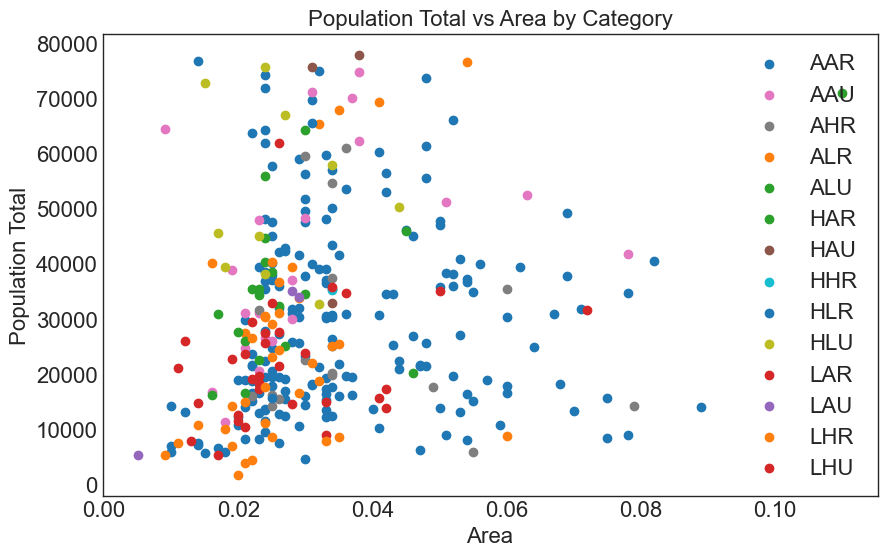

In [55]:
# Import dataset 
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to store color mappings for each unique category
category_colors = {
    category: f'C{i}' for i, category in enumerate(df['category'].unique())
}

# Loop through unique categories and plot each category separately with a different color
for category, group in df.groupby('category'):
    ax.scatter(group['area'], group['poptotal'], label=category, color=category_colors[category])

# Set labels and title
ax.set_xlabel('Area')
ax.set_ylabel('Population Total')
ax.set_title('Population Total vs Area by Category')

# Show legend
ax.legend()

# Show the plot
plt.show()

2. Bubble plot with Encircling
   
- Sometimes you want to show a group of points within a boundary to emphasize their importance. 
- In this example, you get the records from the dataframe that should be encircled and pass it to the `encircle()` described in the code below.

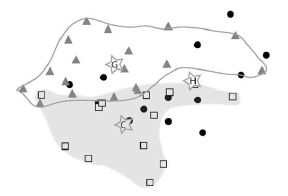

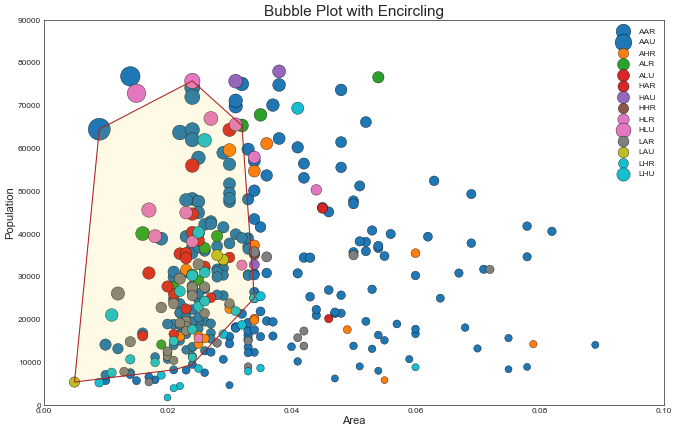

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings
warnings.simplefilter('ignore')  # Ignore all warnings (not recommended for production code)

# Step 1: Prepare Data
df1 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(df1['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 50, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=df1.loc[df1.category==category, :], s='dot_size', color=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
def encircle(x, y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
df1_encircle_data = df1.loc[df1.state=='IN', :]

# Draw polygon surrounding vertices    
encircle(df1_encircle_data.area, df1_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(df1_encircle_data.area, df1_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()
   

3. Scatter plot with linear regression line of best fit

- If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. 
- The below plot shows how the line of best fit differs amongst various groups in the data. 
- To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.

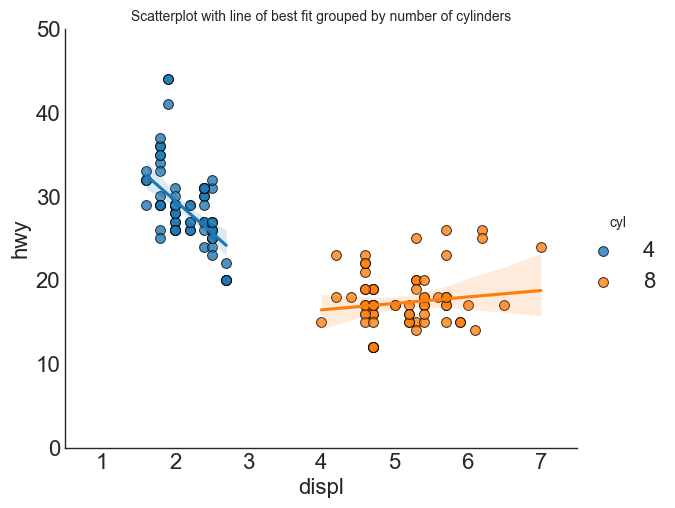

In [37]:
# Import Data
df2 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df2_select = df2.loc[df2.cyl.isin([4, 8]), :]

# Plot with reduced image size
sns.set_style("white")
gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df2_select,
    height=5,    # Reduce the height to 5 inches
    aspect=1.2,  # Adjust the width-to-height ratio
    robust=True,
    palette= 'tab10', # Use palette='Set1', and col="cyl", for showing each regression lines in two different columns of figures.
    scatter_kws=dict(s=50, linewidths=.7, edgecolors='black')
)

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=10)
plt.show()

4. Jittering with stripplot

- Often multiple datapoints have exactly the same X and Y values. 
- As a result, multiple points get plotted over each other and hide. 
- To avoid this, jitter the points slightly so you can visually see them. 
- This is convenient to do using seaborn’s stripplot().

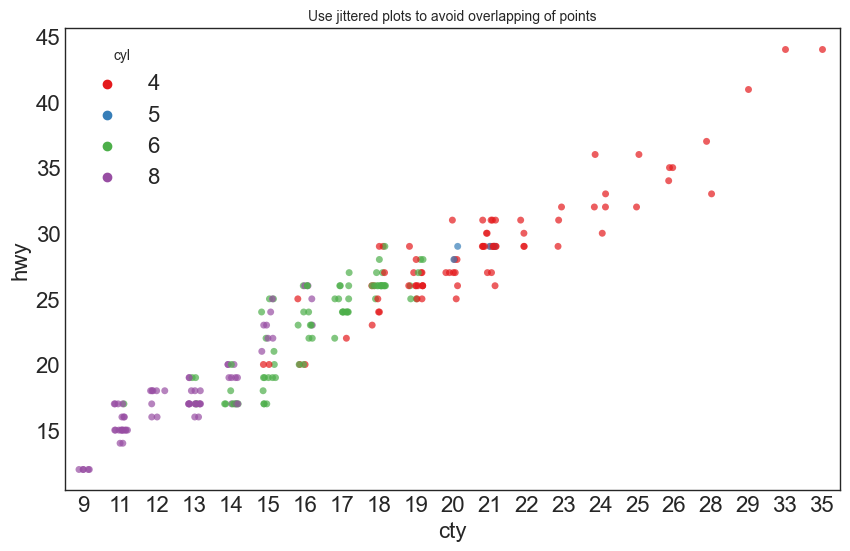

In [56]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot with jitter and different colors
plt.figure(figsize=(10, 6))
sns.stripplot(x='cty', y='hwy', data=df, jitter=0.2, hue='cyl', palette='Set1', alpha=0.7)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=10)
plt.xlabel('cty')
plt.ylabel('hwy')
plt.legend(title='cyl')
plt.show()

5. Counts Plot

- Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. 
- So, larger the size of the point more is the concentration of points around that.

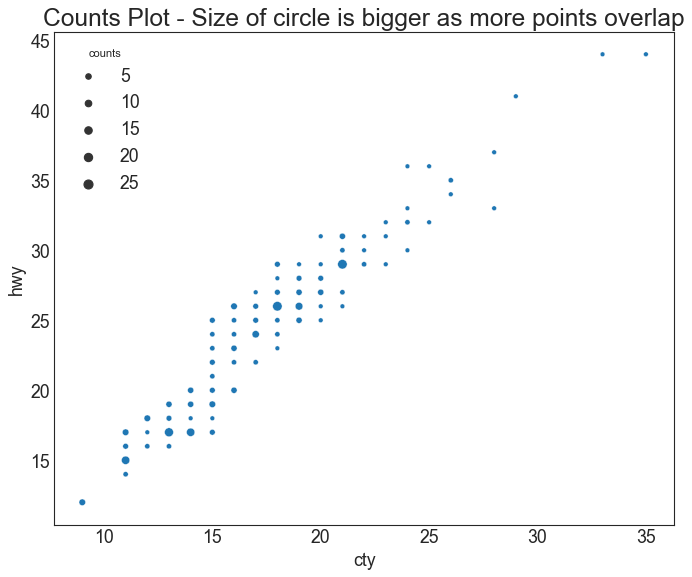

In [54]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
sns.scatterplot(x='cty', y='hwy', data=df_counts, size=df_counts['counts']*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

6. Marginal Histogram

- Marginal histograms have a histogram along the X and Y axis variables. 
- This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. 
- This plot if often used in exploratory data analysis (EDA).

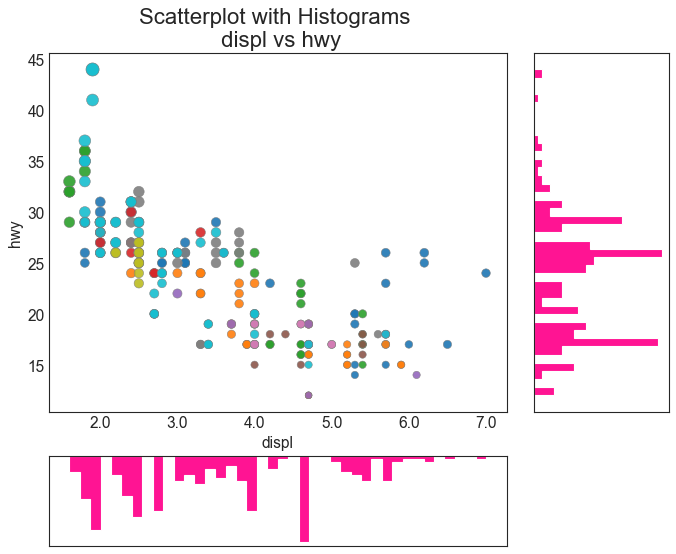

In [60]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

7. Marginal Boxplot
- Marginal boxplot serves a similar purpose as marginal histogram. 
- However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

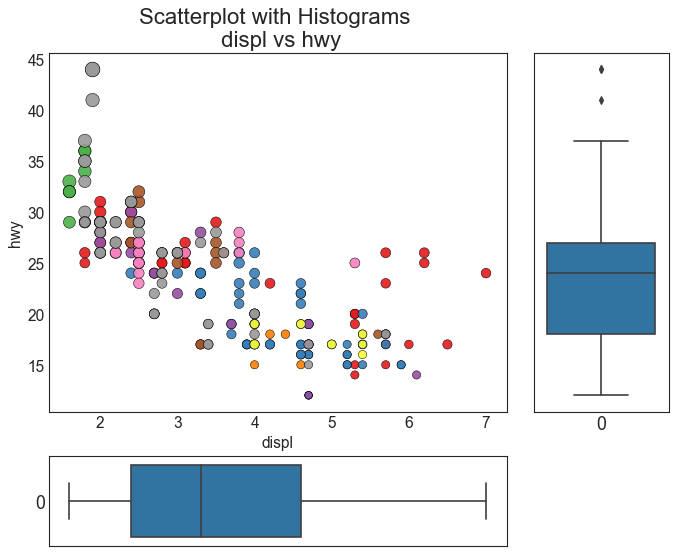

In [59]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

8. Correllogram
- Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

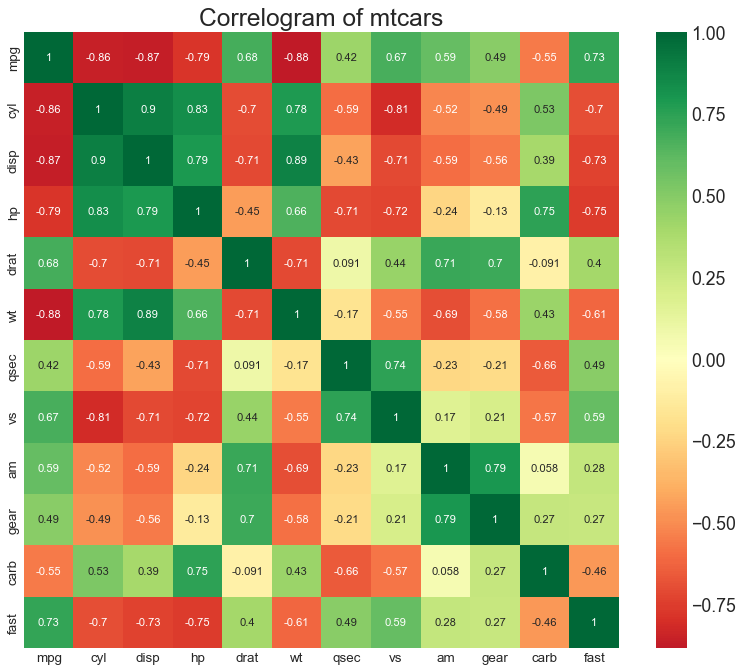

In [61]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

9. Pairwise Plot
- Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. 
- It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

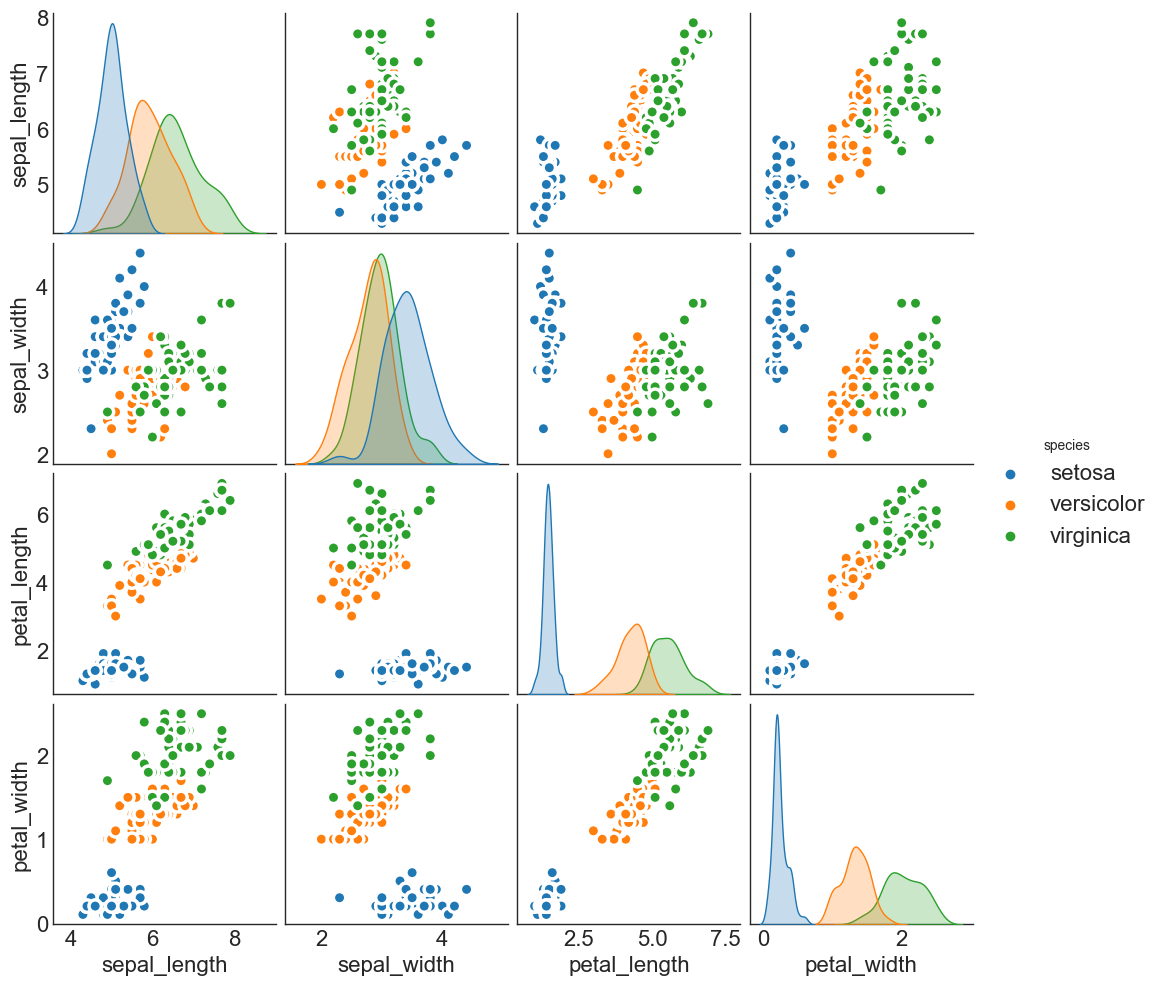

In [64]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

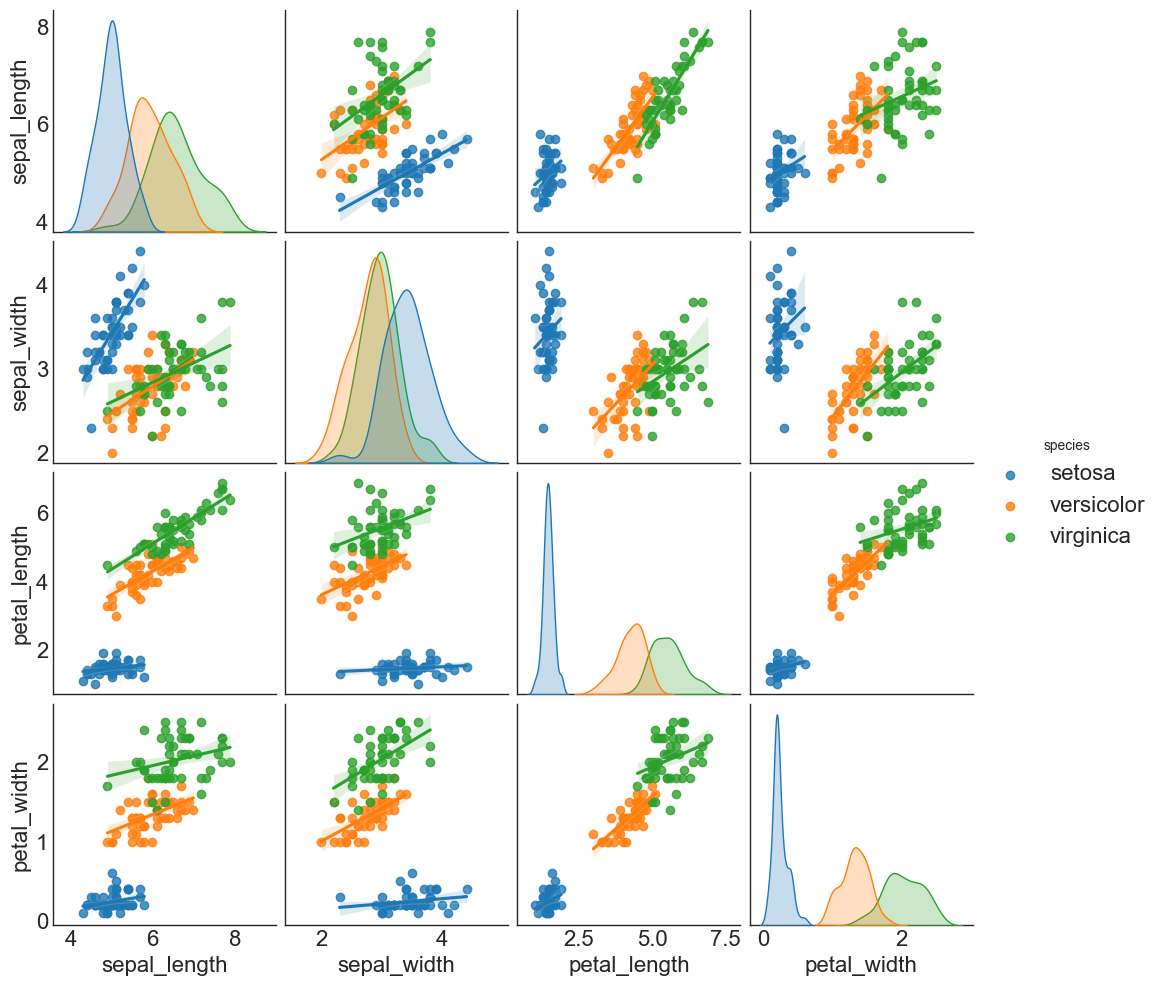

In [65]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Deviation</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
        <li>Diverging Bars</li>
        <li>Diverging Texts</li>
        <li>Diverging Dot Plot</li>
        <li>Diverging Lollipop Chart with Markers</li>
        <li>Area Chart</li>
    </ul>
</div>

10. Diverging Bars

- If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. 
- It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

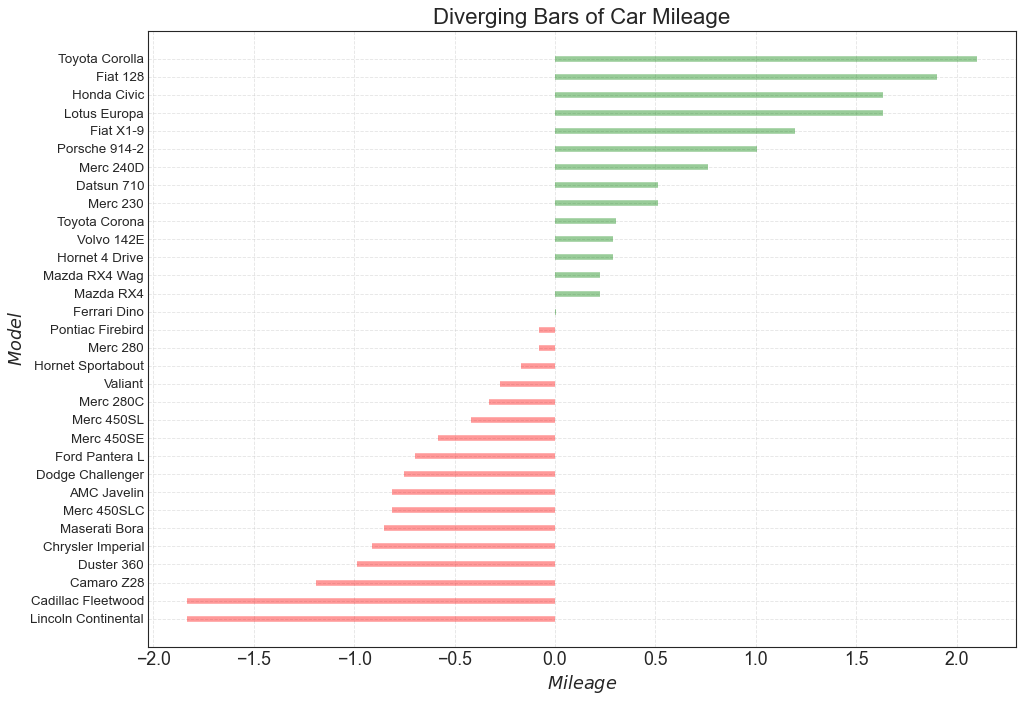

In [66]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

11. Diverging Texts
  
- Diverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

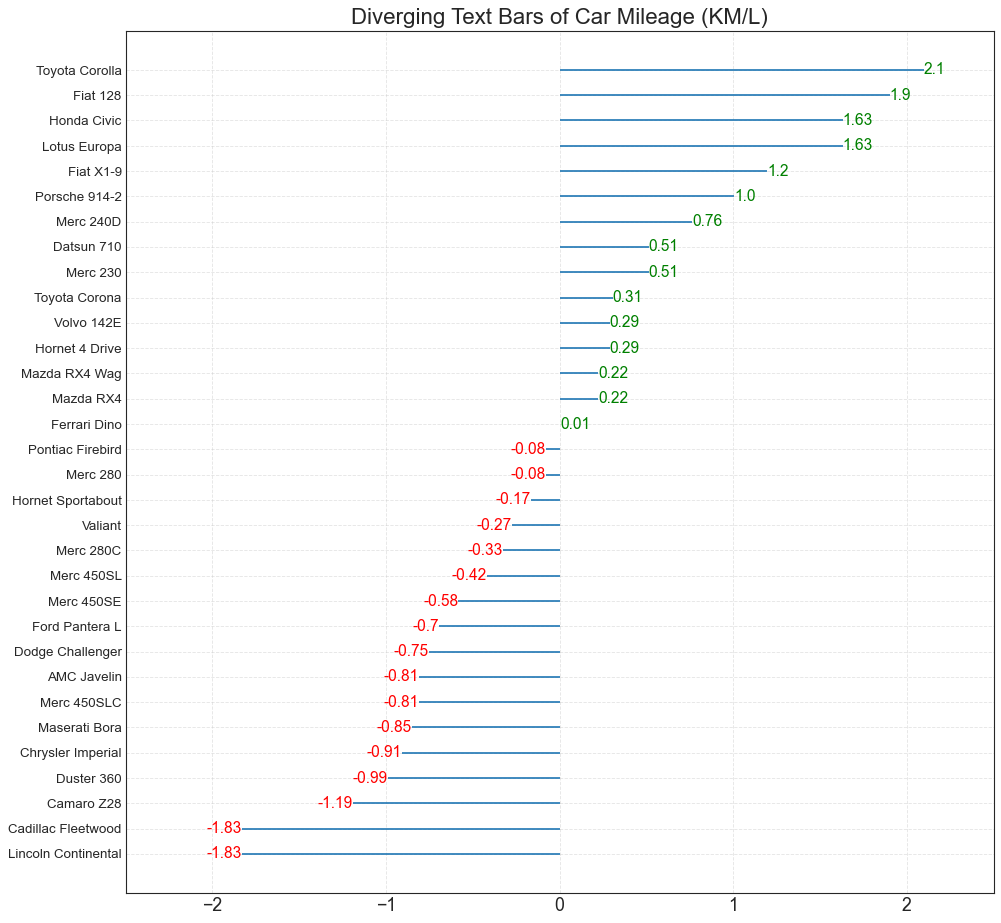

In [68]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage (KM/L)', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

12. Diverging Lollipop Chart with Markers
- Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In [71]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,black
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,black
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,black
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,black
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,black


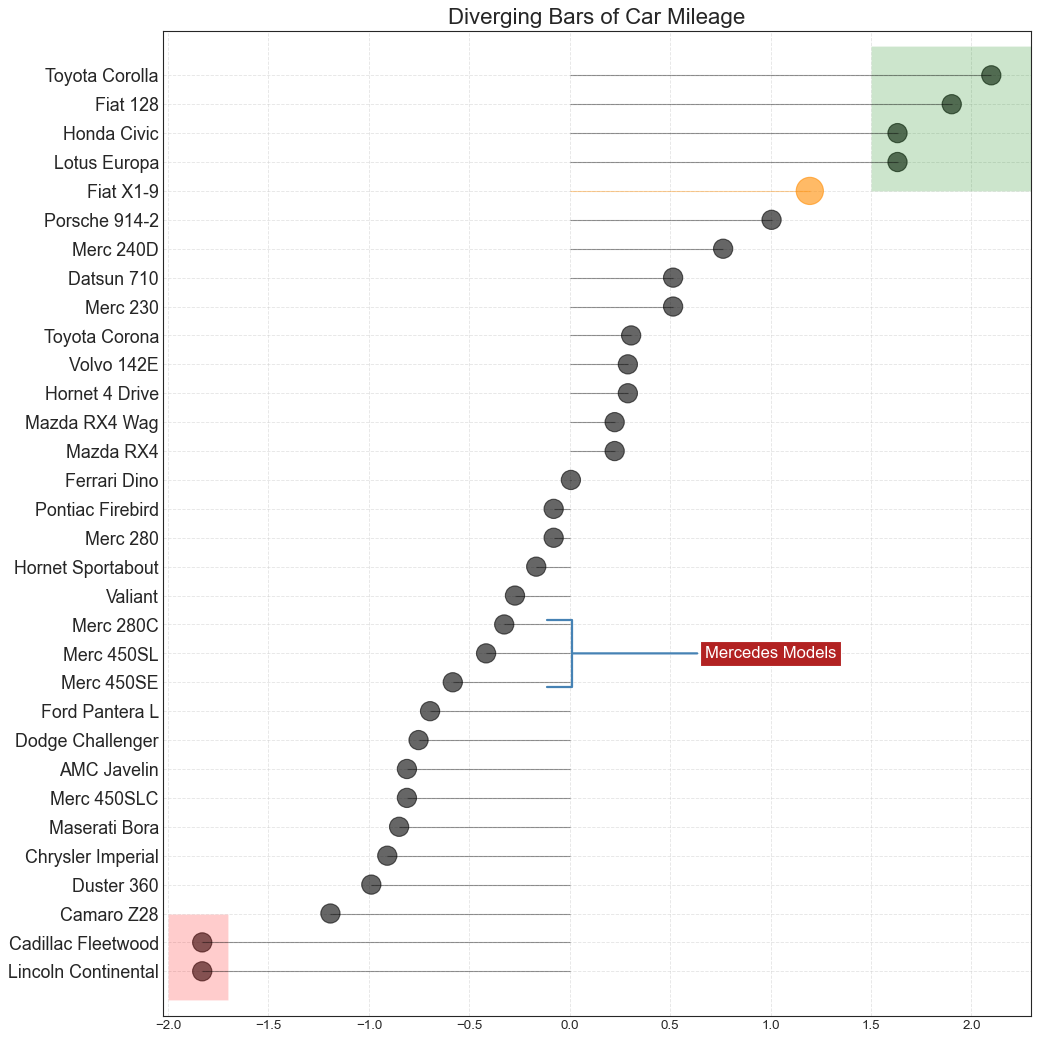

In [69]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

13. Area Chart
- By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. 
- The longer the duration of the highs, the larger is the area under the line.

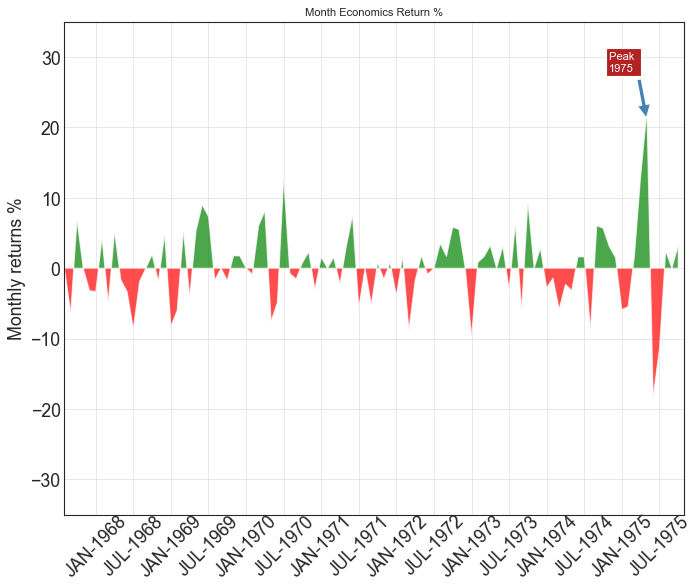

In [76]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(10,8), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=10, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=45, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=10)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Ranking</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
      <li>Ordered Bar Chart</li>
      <li>Lollipop Chart</li>
      <li>Dot Plot</li>
      <li>Slope Chart</li>
      <li>Dumbbell Plot</li>
    </ul>
</div>

14. Ordered Bar Chart
- Ordered bar chart conveys the rank order of the items effectively. 
- But adding the value of the metric above the chart, the user gets the precise information from the chart itself. 
- It is a classic way of visualizing items based on counts or any given metric. 
- Check this free video tutorial on implementing and interpreting ordered bar charts.

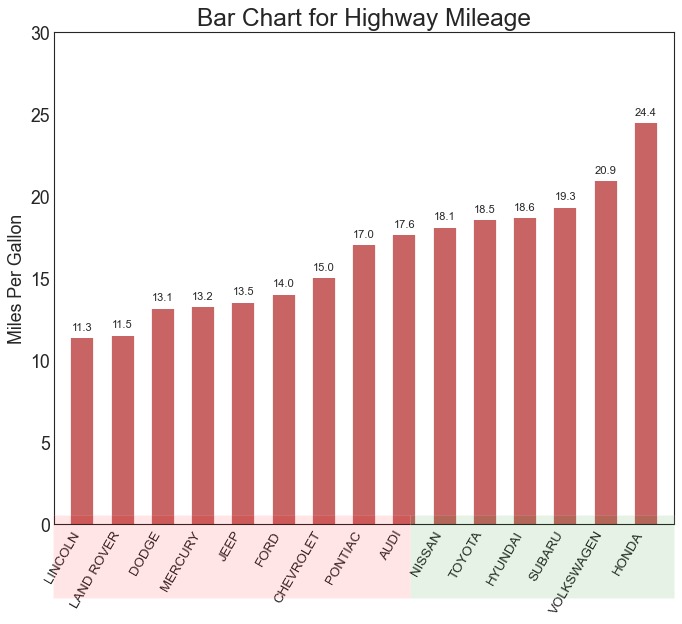

In [78]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,8), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

15. Slope Chart
- Slope chart is most suitable for comparing the ‘Before’ and ‘After’ positions of a given person/item.

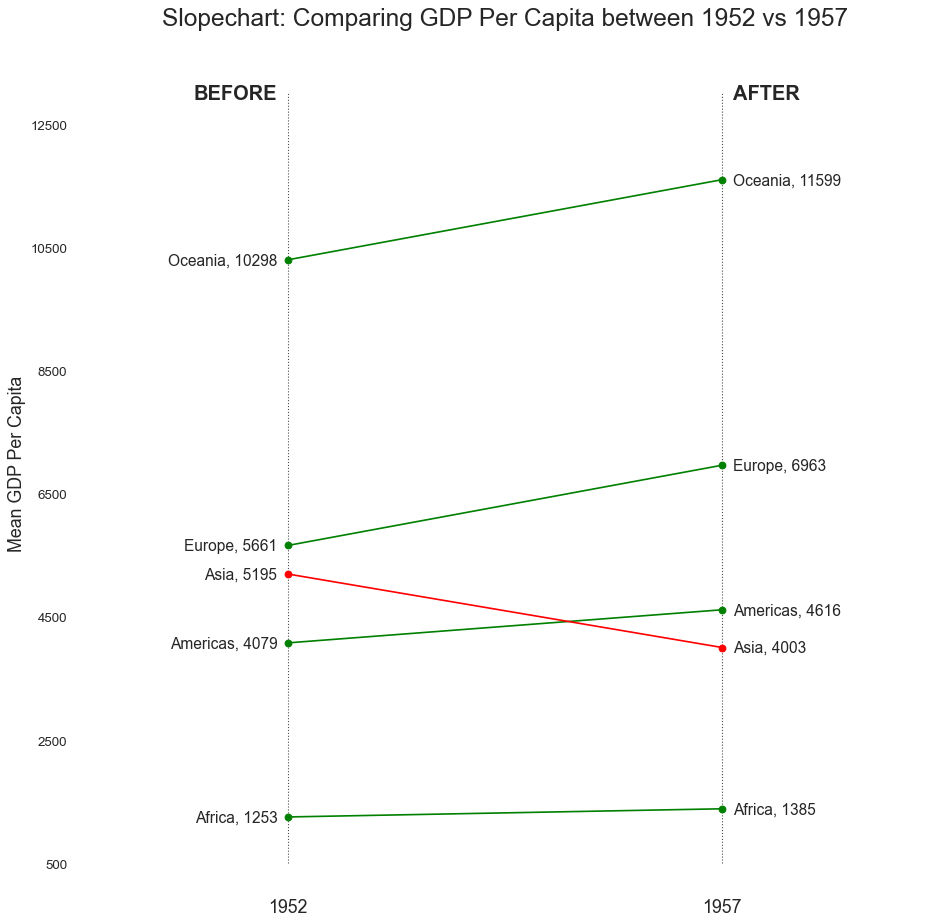

In [79]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Distribution</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
      <li>Histogram for Continuous Variable</li>
      <li>Histogram for Categorical Variable</li>
      <li>Density Plot</li>
      <li>Density Curves with Histogram</li>
      <li>Joy Plot</li>
      <li>Distributed Dot Plot</li>
      <li>Box Plot</li>
      <li>Dot + Box Plot</li>
      <li>Violin Plot</li>
      <li>Population Pyramid</li>
      <li>Categorical Plots</li>
    </ul>
</div>

16. Histogram for Continuous Variable

- Histogram shows the frequency distribution of a given variable. 
- The below representation groups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable in tandem. 
- Create histogram and learn how to interpret them in this free video tutorial.

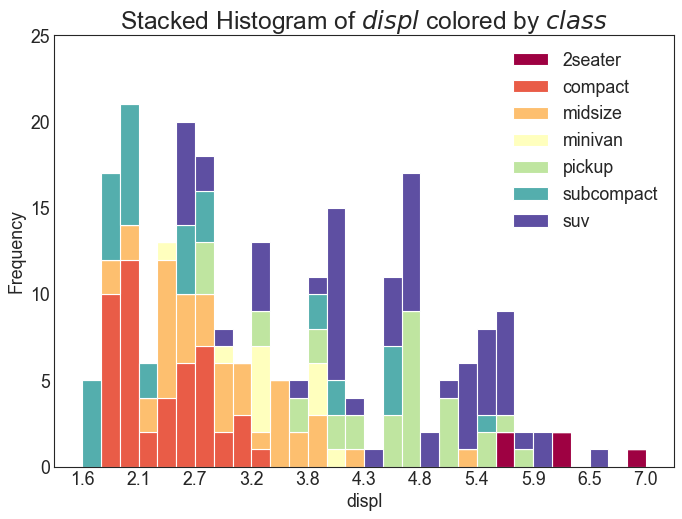

In [83]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(10,7), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

17. Histogram for Categorical Variable
- The histogram of a categorical variable shows the frequency distribution of a that variable. By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

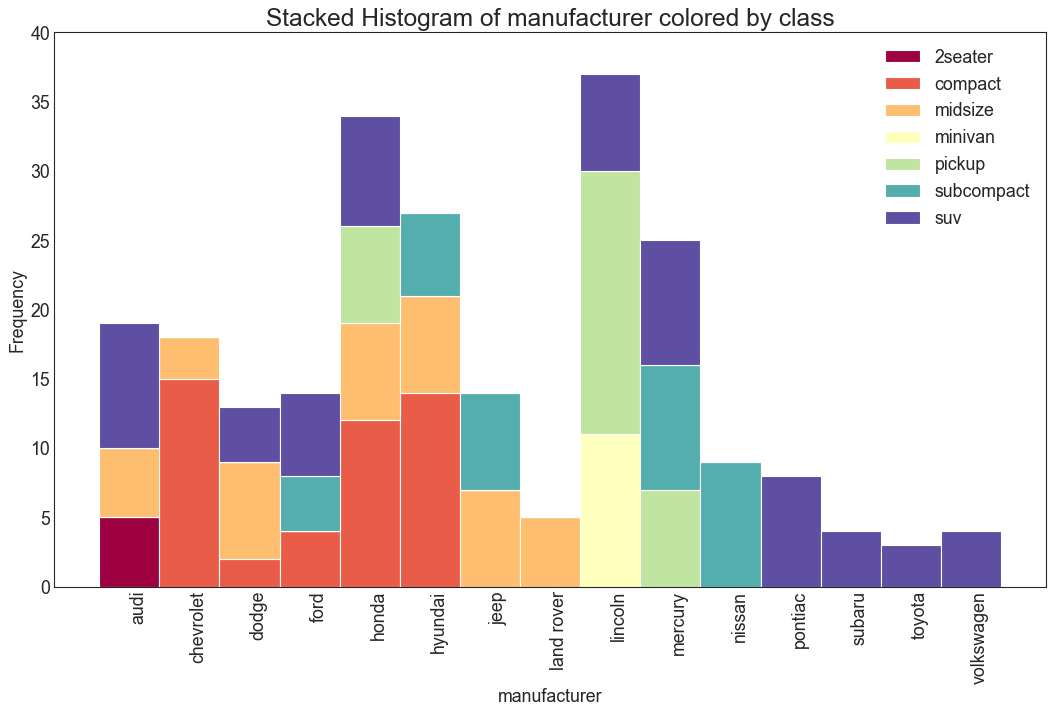

In [85]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, np.arange(len(np.unique(df[x_var]))+1)-0.5, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group: col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=np.arange(len(np.unique(df[x_var]))), labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

18. Density Plot
- Density plots are a commonly used tool visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the relationship between the X and the Y. 
- The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

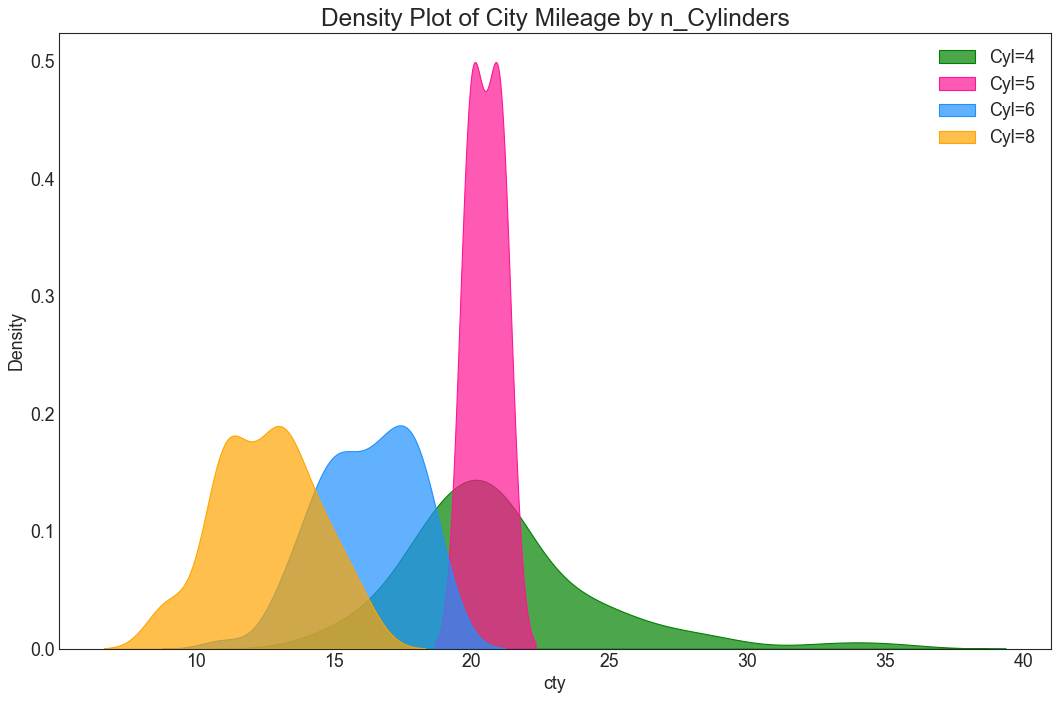

In [86]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Composition</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
    <li>Waffle Chart</li>
    <li>Pie Chart</li>
    <li>Treemap</li>
    <li>Bar Chart</li>
    </ul>
</div>

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Change</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
      <li>Time Series Plot</li>
      <li>Time Series with Peaks and Troughs Annotated</li>
      <li>Autocorrelation Plot</li>
      <li>Cross Correlation Plot</li>
      <li>Time Series Decomposition Plot</li>
      <li>Multiple Time Series</li>
      <li>Plotting with different scales using secondary Y axis</li>
      <li>Time Series with Error Bands</li>
      <li>Stacked Area Chart</li>
      <li>Area Chart Unstacked</li>
      <li>Calendar Heat Map</li>
      <li>Seasonal Plot</li>
    </ul>
</div>

<div style="background-color: #ffbb99; width: 800px; height: auto; padding: 10px; border: 3px solid #ccc;">
    <span style="color: #331100; font-weight: bold;">
        <h2>Groups</h2>
    </span>
    <ul style="list-style-type: disc; margin-left: 30px;">
      <li>Dendrogram</li>
      <li>Cluster Plot</li>
      <li>Andrews Curve</li>
      <li>Slope Chart</li>
      <li>Parallel Coordinates</li>
    </ul>
</div>

## Reference

- https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/